## HARINI P   917719C028   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Load dataset

In [2]:
df = pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 3. Visualizations

Univariate Analysis

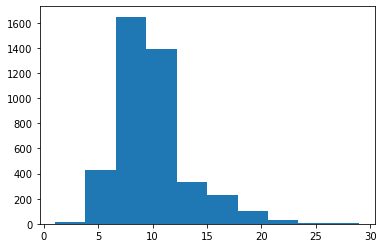

In [4]:
plt.hist(df['Rings'])
plt.show()

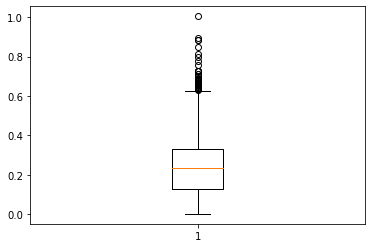

In [5]:
plt.boxplot(df['Shell weight'])
plt.show()

Bivariate Analysis

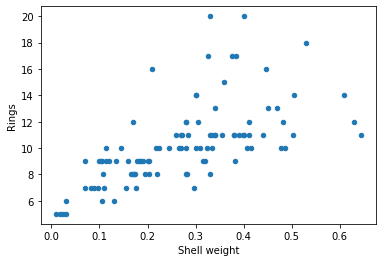

In [6]:
df.sample(100).plot.scatter(x='Shell weight',y='Rings')
plt.show()

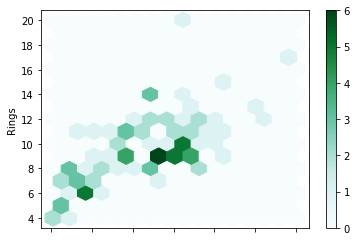

In [7]:
df.sample(100).plot.hexbin(x='Shell weight',y='Rings',gridsize=15)
plt.show()

Multivariate Analysis

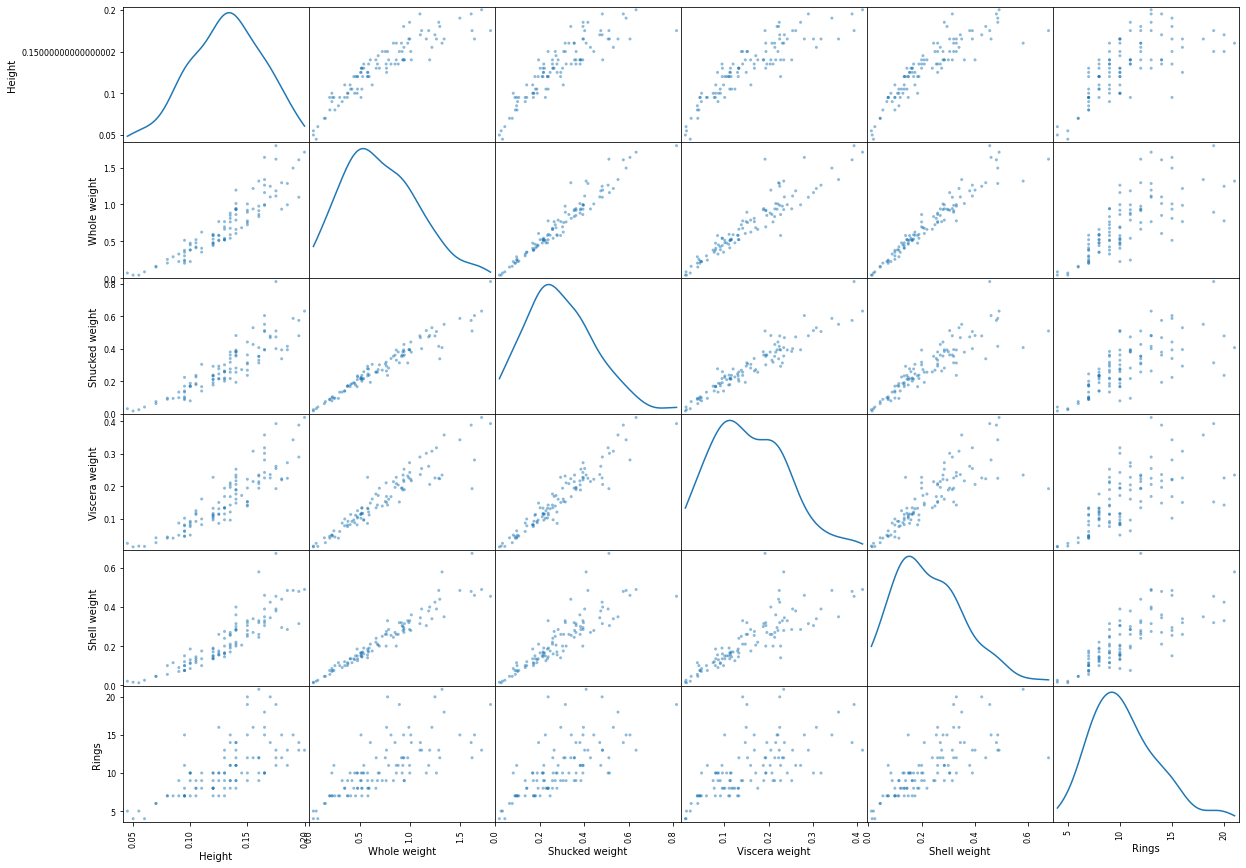

In [8]:
pd.plotting.scatter_matrix(df.loc[:100,'Height':'Rings'], diagonal="kde", figsize=(20,15))
plt.show()

## 4. Describe

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 5. Handle missing values

In [10]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

No missing values are present in the dataset

## 6. Find outliers and replace them using IQR

C:\Users\HARSHINI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

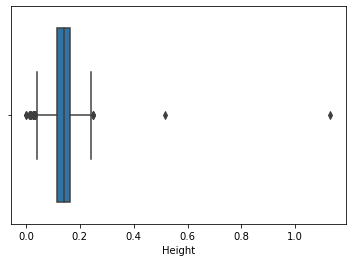

In [11]:
sns.boxplot(df.Height)

In [12]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)

IQR = Q3 - Q1
upperLimit = Q3 + 1.5 * IQR
lowerLimit = Q1 - 1.5 * IQR

df = df[df.Height < upperLimit]

C:\Users\HARSHINI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

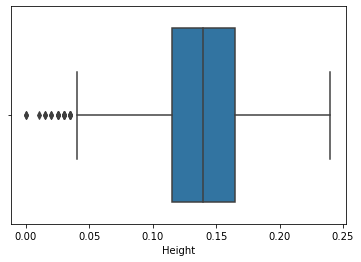

In [13]:
sns.boxplot(df.Height)

## 7. Check for Categorical columns and perform Encoding

In [14]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Sex = le.fit_transform(df.Sex)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 8. Split data into dependent and independent variables

In [16]:
#Independent variable X
X = df.drop(columns = 'Rings', axis = 1)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [17]:
#Dependent variable Y
Y = df.Rings
Y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

## 9. Scale the independent variables

In [18]:
from sklearn.preprocessing import scale
X_scaled = pd.DataFrame(scale(X), columns = X.columns)
X_scaled.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151967,-0.573675,-0.431099,-1.149181,-0.641648,-0.607504,-0.726912,-0.637840
1,1.151967,-1.448964,-1.439987,-1.279445,-1.232035,-1.172915,-1.208017,-1.214249
2,-1.281454,0.051531,0.123789,-0.107065,-0.308084,-0.462759,-0.355774,-0.205533
3,1.151967,-0.698716,-0.431099,-0.367594,-0.637555,-0.648213,-0.607781,-0.601814
4,-0.064743,-1.615686,-1.540876,-1.539974,-1.273986,-1.218148,-1.290492,-1.322326


## 10. Train test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 0)
X_train.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3908,-0.064743,0.134892,-0.077988,0.153463,-0.144372,-0.198146,0.006200,-0.169508
2865,-0.064743,-1.282242,-1.389543,-1.279445,-1.313891,-1.306352,-1.263000,-1.250275
1122,1.151967,0.176572,0.073345,0.023199,-0.015448,0.464516,-0.488651,-0.147892
880,1.151967,1.051861,1.183122,0.935050,1.317783,1.430239,1.234162,1.156233
2668,1.151967,0.593376,0.628234,0.674521,0.573916,0.600215,0.478140,0.691504


In [20]:
X_train.shape

(2920, 8)

In [21]:
Y_train.shape

(2920,)

## 11. Build the Model

In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## 12. Train the model

In [23]:
lm.fit(X_train, Y_train)

LinearRegression()

## 13. Test the model

In [24]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

## 14. Performance measurement

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(Y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(Y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :4.713085
Mean Squared error of testing set :5.132603


In [26]:
from sklearn.metrics import r2_score
s = r2_score(Y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(Y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.54
R2 Score of testing set:0.52
